# Visualize Samples Being Used
Compare images at the analysis resolution to the full-res originals to ensure by visual inspection that we're not losing significant information.

In [1]:
import numpy as np

import preprocessing
import h5py
import os
import torch

import matplotlib as mpl
from matplotlib import pyplot as plt

from importlib import reload

In [2]:
dataset = 'gallearn_data_256x256_2d_tgt.h5'

In [3]:
d = preprocessing.load_data(dataset)
X_orig = d['X']
X = preprocessing.std_asinh(X_orig)
ys = d['ys_sorted']
fnames = d['file_names']
obs_names = d['obs_sorted']

0 min, 16.8 s to load


In [4]:
direc = (
    "/DFS-L/DATA/cosmo/kleinca/FIREBox_Images/host/"                   
    "ugrband_massmocks_final"
)
allfiles = np.array(
    [f 
     for f in os.listdir(direc) 
     if os.path.isfile(os.path.join(direc, f))]
)

masks = np.array(
    [[obj_name + '_' in file for file in allfiles] for obj_name in obs_names]
)
fnames = np.array([allfiles[mask] for mask in masks])
if fnames.shape != (X.shape[0], 1):
    raise Exception('Duplicate files were matched to a single object name.')
fnames = fnames.flatten()

FileNotFoundError: [Errno 2] No such file or directory: '/DFS-L/DATA/cosmo/kleinca/FIREBox_Images/host/ugrband_massmocks_final'

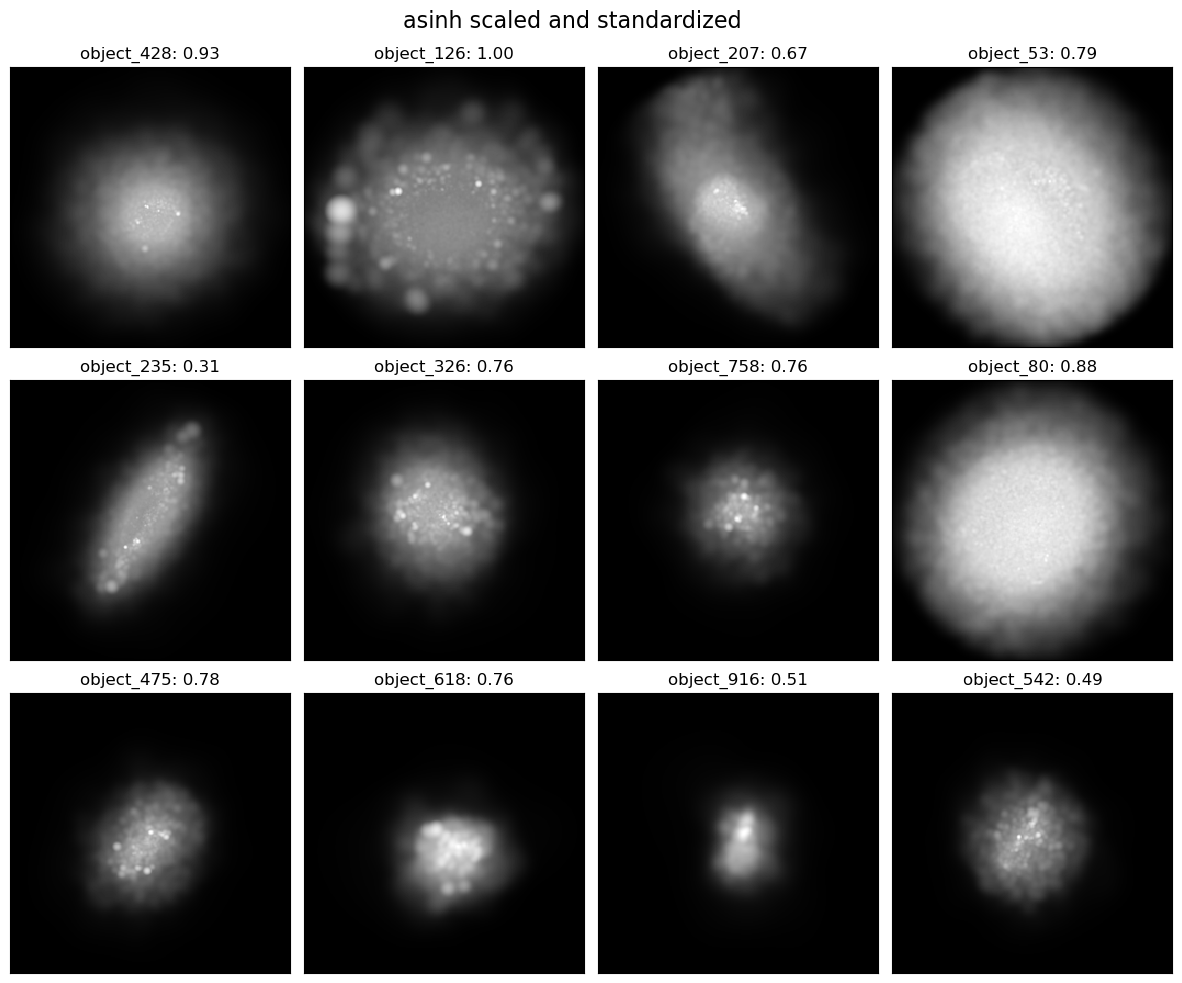

In [23]:
reload(preprocessing)

X_new = preprocessing.std_asinh(X_orig)

Nsubplots = 3 * 4
#indices = np.random.randint(0, X_new.shape[0], Nsubplots)
example_data = X_new[indices]
example_targets = ys[indices]

fig = plt.figure(figsize=(15, 20 * 3 / 5))
fig.subplots_adjust(hspace=0.05, wspace=0.05)

for i in range(Nsubplots):
    ax = fig.add_subplot(3, 4, i+1)
    ax.imshow(
        example_data[i][0], 
        cmap='gray', 
        interpolation='none',
        #norm=mpl.colors.LogNorm(vmin=5.e5, vmax=1.e8)
    )
    if '2d_tgt' in dataset:
        tgt_str = "{0}: {1:0.2f}"
    else:
        tgt_str = "{1:0.2f}, {2:0.2f}"
    ax.set_title(tgt_str.format(
        obs_names[indices][i],
        *example_targets[i]
    ))
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_facecolor('k')
plt.suptitle('asinh scaled and standardized', y=0.92, fontsize=16)
plt.show()

## Analysis Resolution

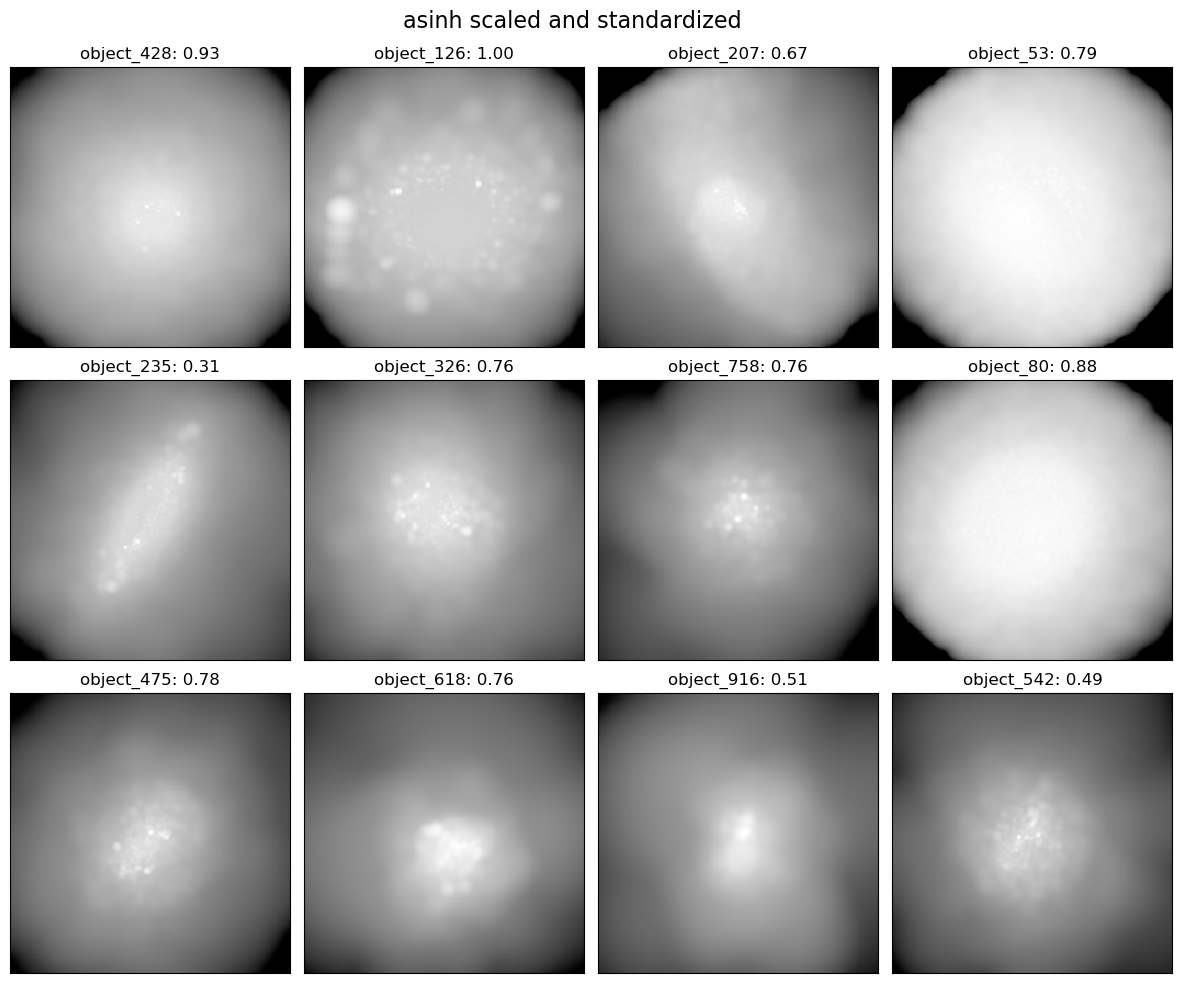

In [12]:
Nsubplots = 3 * 4
#indices = np.random.randint(0, X.shape[0], Nsubplots)
example_data = X[indices]
example_targets = ys[indices]

fig = plt.figure(figsize=(15, 20 * 3 / 5))
fig.subplots_adjust(hspace=0.05, wspace=0.05)

for i in range(Nsubplots):
    ax = fig.add_subplot(3, 4, i+1)
    ax.imshow(
        example_data[i][0], 
        cmap='gray', 
        interpolation='none',
        #norm=mpl.colors.LogNorm(vmin=5.e5, vmax=1.e8)
    )
    if '2d_tgt' in dataset:
        tgt_str = "{0}: {1:0.2f}"
    else:
        tgt_str = "{1:0.2f}, {2:0.2f}"
    ax.set_title(tgt_str.format(
        obs_names[indices][i],
        *example_targets[i]
    ))
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_facecolor('k')
plt.suptitle('asinh scaled and standardized', y=0.92, fontsize=16)
plt.show()

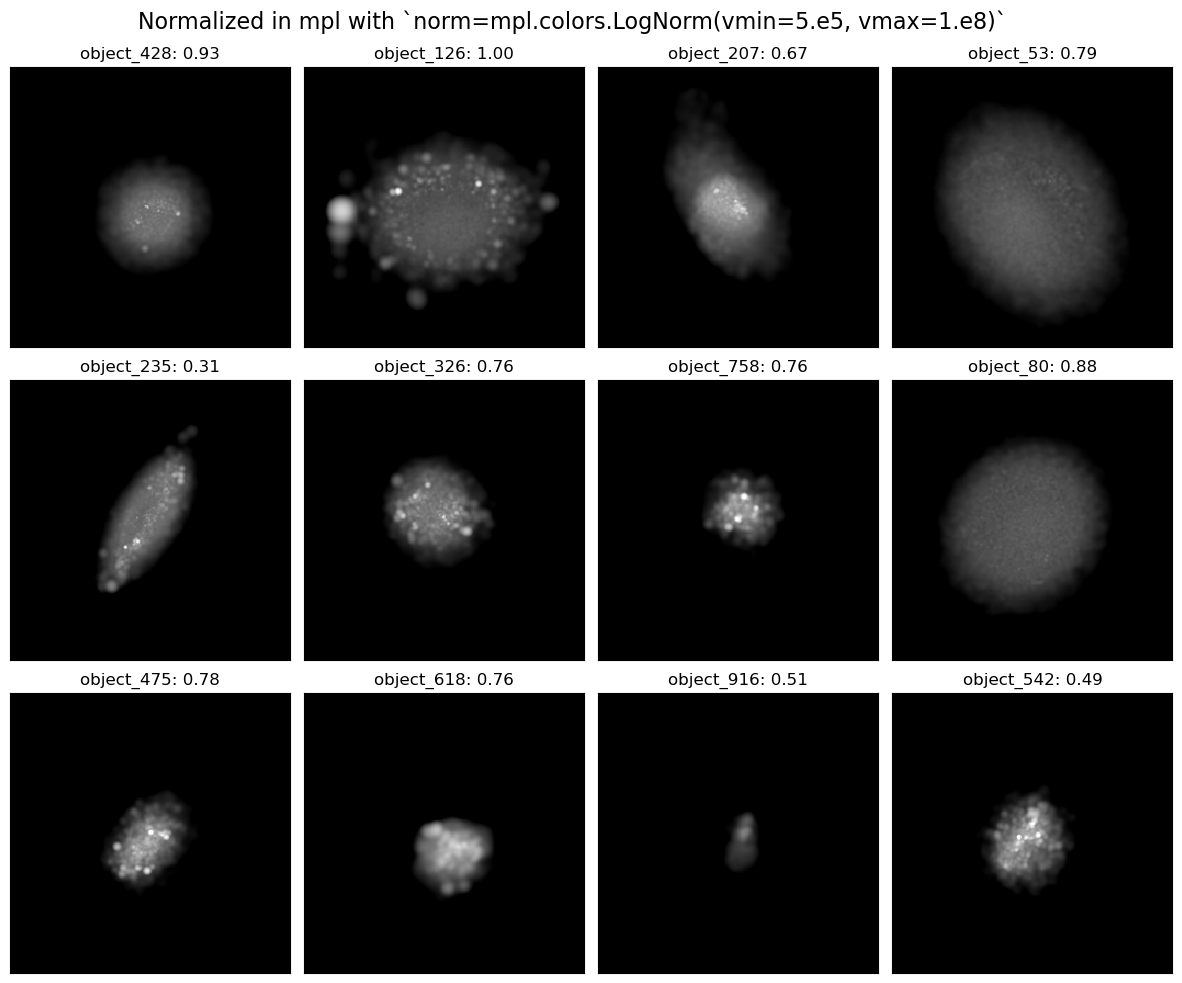

In [19]:
Nsubplots = 3 * 4
example_data = X_orig[indices]
example_targets = ys[indices]

fig = plt.figure(figsize=(15, 20 * 3 / 5))
fig.subplots_adjust(hspace=0.05, wspace=0.05)

for i in range(Nsubplots):
    ax = fig.add_subplot(3, 4, i+1)
    ax.imshow(
        example_data[i][0], 
        cmap='gray', 
        interpolation='none',
        norm=mpl.colors.LogNorm(vmin=5.e5, vmax=1.e8)
    )
    if '2d_tgt' in dataset:
        tgt_str = "{0}: {1:0.2f}"
    else:
        tgt_str = "{1:0.2f}, {2:0.2f}"
    ax.set_title(tgt_str.format(
        obs_names[indices][i],
        *example_targets[i]
    ))
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_facecolor('k')
plt.suptitle(
    'Normalized in mpl with `norm=mpl.colors.LogNorm(vmin=5.e5, vmax=1.e8)`',
    y=0.92,
    fontsize=16
)
plt.show()

## Original Resolution

In [8]:
fig = plt.figure(figsize=(15, 20 * 3 / 5))
fig.subplots_adjust(hspace=0.05, wspace=0.05)

for i in range(Nsubplots):
    with h5py.File(os.path.join(direc, fnames[indices[i]]), 'r') as f:
        image = torch.FloatTensor(np.array(f['projection_xy']['band_g']))
    
    ax = fig.add_subplot(3, 4, i+1)
    ax.imshow(
        image, 
        cmap='gray', 
        interpolation='none',
        norm=mpl.colors.LogNorm(vmin=5.e5, vmax=1.e8)
    )
    if '2d_tgt' in dataset:
        title_str = "{0:0.2f} ({1:0.0f}x{2:0.0f})"
    else:
        title_str = "{0:0.2f}, {1:0.2f} ({2:0.0f}x{3:0.0f})"
    ax.set_title(title_str.format(
        *example_targets[i],
        *image.shape
    ))
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_facecolor('k')
plt.show()

NameError: name 'direc' is not defined

<Figure size 1500x1200 with 0 Axes>